<a href="https://colab.research.google.com/github/aljebraschool/Machine_Learning_A_Z_Basic/blob/main/Copy_of_thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [ ]:
import random
NUMBER_OF_USER = 500
NUMBER_OF_ADS = 10
list_of_ads_selected = []

number_of_times_ads_got_reward_one = [0] * NUMBER_OF_ADS
number_of_times_ads_got_reward_zero = [0] * NUMBER_OF_ADS
total_reward = 0

for i in range(NUMBER_OF_USER):
  ads = 0
  max_random = -1
  for j in range(NUMBER_OF_ADS):
    random_beta = random.betavariate(number_of_times_ads_got_reward_one[j]+1, number_of_times_ads_got_reward_zero[j] + 1)

    if random_beta > max_random:
      max_random = random_beta
      ads = j

  reward = dataset.values[i, ads]
  list_of_ads_selected.append(ads)

  if reward == 1:
    number_of_times_ads_got_reward_one[ads] += 1
  else:
    number_of_times_ads_got_reward_zero[ads] += 1

  total_reward += reward


## Visualising the results - Histogram

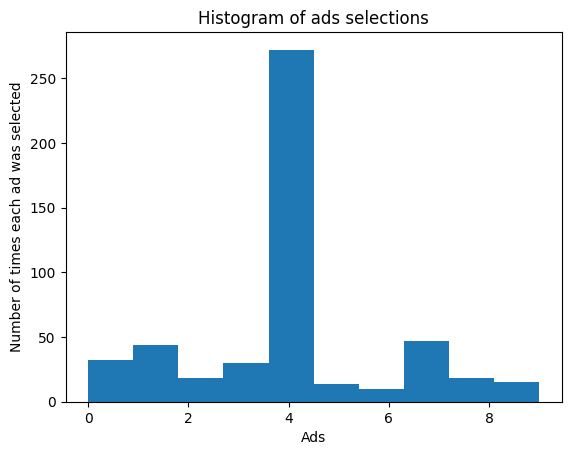

In [ ]:
plt.hist(list_of_ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()